In [2]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp
from ks_metric import ks_score


X, y = make_classification(
    n_samples=1000, class_sep=0.3, random_state=0
)  # 1000 samples with 20 features

# split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# simple Logistic Model
model = LogisticRegression(random_state=23)
model.fit(X_train, y_train)

# predictions
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

print("Accuracy train:", accuracy_score(y_train, y_train_pred > 0.5))
print("Accuracy test:", accuracy_score(y_test, y_test_pred > 0.5))
print("F1 train:", f1_score(y_train, y_train_pred > 0.5))
print("F1 test:", f1_score(y_test, y_test_pred > 0.5))
print("AUC train:", roc_auc_score(y_train, y_train_pred))
print("AUC test:", roc_auc_score(y_test, y_test_pred))
print("KS train:", ks_2samp(y_train, y_train_pred).statistic)
print("KS test:", ks_2samp(y_test, y_test_pred).statistic)

Accuracy train: 0.7328358208955223
Accuracy test: 0.7181818181818181
F1 train: 0.7089430894308942
F1 test: 0.7223880597014926
AUC train: 0.7871932515337423
AUC test: 0.7467986458639977
KS train: 0.5134328358208955
KS test: 0.5212121212121212


In [7]:
auc_train = []
auc_test = []
ks_train = []
ks_test = []
for i in range(50):
    X, y = make_classification(
        n_samples=100, class_sep=i*0.02, random_state=0
    )  # 1000 samples with 20 features

    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )

    # simple Logistic Model
    model = LogisticRegression(random_state=23)
    model.fit(X_train, y_train)

    # predictions
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    auc_train.append(roc_auc_score(y_train, y_train_pred, average=None))
    auc_test.append(roc_auc_score(y_test, y_test_pred, average=None))
    ks_train.append(ks_score(y_train, y_train_pred))
    ks_test.append(ks_score(y_test, y_test_pred))

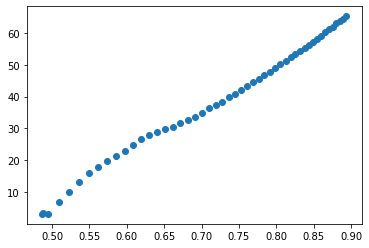

In [4]:
from matplotlib import pyplot as plt
# plt.scatter(auc_train, ks_train)
plt.scatter(auc_test, ks_test)

In [5]:
for x,y in zip(auc_test, ks_test):
    print(x.round(2),y.round(2))

0.49 3.34
0.49 3.21
0.5 3.15
0.51 6.81
0.52 9.9
0.54 13.33
0.55 15.94
0.56 17.89
0.57 19.83
0.59 21.37
0.6 23.01
0.61 24.77
0.62 26.74
0.63 27.83
0.64 28.9
0.65 29.79
0.66 30.57
0.67 31.6
0.68 32.57
0.69 33.65
0.7 34.96
0.71 36.29
0.72 37.43
0.73 38.38
0.74 39.79
0.74 40.93
0.75 42.04
0.76 43.39
0.77 44.45
0.78 45.45
0.78 46.8
0.79 47.89
0.8 48.94
0.81 50.11
0.81 51.23
0.82 52.36
0.83 53.53
0.83 54.35
0.84 55.3
0.84 56.09
0.85 57.15
0.85 58.2
0.86 59.21
0.87 60.2
0.87 61.26
0.88 61.95
0.88 63.14
0.88 63.68
0.89 64.44
0.89 65.27


In [10]:
pd.Series(auc_test).corr(pd.Series(ks_test))

0.9984698814975749

In [6]:
pd.Series(auc_test).corr(pd.Series(ks_test))

0.9971162872413577

In [8]:
pd.Series(auc_test).corr(pd.Series(ks_test))

0.9728101950178002